In [1]:
list.files()

[1] "Sendy"                  "Untitled.ipynb"         "quasi_group.aux"       
 [4] "quasi_group.log"        "quasi_group.pdf"        "quasi_group.synctex.gz"
 [7] "quasi_group.tex"        "sometex.aux"            "sometex.log"           
[10] "sometex.pdf"            "sometex.synctex.gz"     "sometex.tex"

In [2]:
### Loading the necessary libraries
options(warn=-1)
library(tidyverse)
library(broom)
library(janitor)
library(corrplot)
library(caret)
library(RANN)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.5
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘janitor’

The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test

corrplot 0.85 loaded
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In [4]:
source_file <- 'Sendy/Train.csv'
rider_data <- 'Sendy/Riders.csv'
input_data <- read.csv(source_file, header=T, stringsAsFactors = F)
rider_details <- read.csv(rider_data, header=T, stringsAsFactors = F)
combined_data <- left_join(input_data, rider_details, by="Rider.Id")
input_data <- combined_data %>% clean_names()
# glimpse(input_data)


[1] "Sendy/Riders.csv"

In [5]:
head(rider_details)

,Rider.Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
,<chr>,<int>,<int>,<dbl>,<int>
1,Rider_Id_396,2946,2298,14.0,1159
2,Rider_Id_479,360,951,13.5,176
3,Rider_Id_648,1746,821,14.3,466
4,Rider_Id_753,314,980,12.5,75
5,Rider_Id_335,536,1113,13.7,156
6,Rider_Id_720,2608,1798,13.2,504


In [ ]:
head()

In [3]:
head(input_data)

,order_no,user_id,vehicle_type,platform_type,personal_or_business,placement_day_of_month,placement_weekday_mo_1,placement_time,confirmation_day_of_month,confirmation_weekday_mo_1,⋯,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,time_from_pickup_to_arrival,no_of_orders,age,average_rating,no_of_ratings
,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<int>
1,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,⋯,-1.317755,36.83037,-1.300406,36.82974,Rider_Id_432,745,1637,1309,13.8,549
2,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,⋯,-1.351453,36.89932,-1.295004,36.81436,Rider_Id_856,1993,396,339,13.6,69
3,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,⋯,-1.308284,36.84342,-1.300921,36.82820,Rider_Id_155,455,1023,242,12.5,114
4,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,⋯,-1.281301,36.83240,-1.257147,36.79506,Rider_Id_855,1341,886,283,14.5,113
5,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,⋯,-1.266597,36.79212,-1.295041,36.80982,Rider_Id_770,1214,2311,872,14.1,533
6,Order_No_7408,User_Id_1342,Bike,3,Business,14,5,3:07:35 PM,14,5,⋯,-1.302583,36.76708,-1.257309,36.80601,Rider_Id_124,3191,3288,1204,14.2,1056


In [4]:
tail(input_data)

,order_no,user_id,vehicle_type,platform_type,personal_or_business,placement_day_of_month,placement_weekday_mo_1,placement_time,confirmation_day_of_month,confirmation_weekday_mo_1,⋯,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,time_from_pickup_to_arrival,no_of_orders,age,average_rating,no_of_ratings
,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<int>
21196,Order_No_9932,User_Id_3582,Bike,3,Business,2,6,1:08:34 PM,2,6,⋯,-1.238406,36.87187,-1.276549,36.76698,Rider_Id_34,2325,20,378,15.0,5
21197,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,⋯,-1.258414,36.80480,-1.275285,36.80270,Rider_Id_953,9,1270,367,14.4,131
21198,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34 AM,13,6,⋯,-1.307143,36.82501,-1.331619,36.84798,Rider_Id_155,770,1023,242,12.5,114
21199,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,⋯,-1.286018,36.89753,-1.258414,36.80480,Rider_Id_697,2953,314,473,13.8,29
21200,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,⋯,-1.250030,36.87417,-1.279210,36.79487,Rider_Id_347,1380,2451,1821,14.0,1101
21201,Order_No_9836,User_Id_718,Bike,3,Business,26,2,2:19:47 PM,26,2,⋯,-1.255189,36.78220,-1.320157,36.83089,Rider_Id_177,2128,526,286,13.6,70


In [6]:
colSums(sapply(input_data, is.na))

order_no                             user_id 
                                  0                                   0 
                       vehicle_type                       platform_type 
                                  0                                   0 
               personal_or_business              placement_day_of_month 
                                  0                                   0 
             placement_weekday_mo_1                      placement_time 
                                  0                                   0 
          confirmation_day_of_month           confirmation_weekday_mo_1 
                                  0                                   0 
                  confirmation_time      arrival_at_pickup_day_of_month 
                                  0                                   0 
     arrival_at_pickup_weekday_mo_1              arrival_at_pickup_time 
                                  0                                   0 
                pickup_day_of_month                 pickup_weekday_mo_1 
                                  0                                   0 
                        pickup_time arrival_at_destination_day_of_month 
                                  0                                   0 
arrival_at_destination_weekday_mo_1         arrival_at_destination_time 
                                  0                                   0 
                        distance_km                         temperature 
                                  0                                4366 
       precipitation_in_millimeters                          pickup_lat 
                              20649                                   0 
                        pickup_long                     destination_lat 
                                  0                                   0 
                   destination_long                            rider_id 
                                  0                                   0 
        time_from_pickup_to_arrival                        no_of_orders 
                                  0                                   0 
                                age                      average_rating 
                                  0                                   0 
                      no_of_ratings 
                                  0

In [7]:
dimensions <- dim(input_data)
num_rows <- dimensions[1]
num_cols <- dimensions[2]

In [8]:
options(warn=-1)
input_data %>% 
  select_if( function(x) any(is.na(x)) ) %>% 
  summarise_each( funs( sum(is.na(.))/num_rows ))

temperature,precipitation_in_millimeters
<dbl>,<dbl>
0.2059337,0.9739635


In [9]:
# precipitation has 97.39635% missing values. We choose to drop the column.
# temperature has 20.6 % missiing values. We choose to keep the variable and carry on with the data cleaning
# we also drop vehicle_type column since only bikes are considered in this project
cleaned_data <- input_data %>% select(-c(precipitation_in_millimeters,vehicle_type, order_no, user_id))
head(cleaned_data)

,platform_type,personal_or_business,placement_day_of_month,placement_weekday_mo_1,placement_time,confirmation_day_of_month,confirmation_weekday_mo_1,confirmation_time,arrival_at_pickup_day_of_month,arrival_at_pickup_weekday_mo_1,⋯,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,time_from_pickup_to_arrival,no_of_orders,age,average_rating,no_of_ratings
,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<int>
1,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,⋯,-1.317755,36.83037,-1.300406,36.82974,Rider_Id_432,745,1637,1309,13.8,549
2,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,⋯,-1.351453,36.89932,-1.295004,36.81436,Rider_Id_856,1993,396,339,13.6,69
3,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,⋯,-1.308284,36.84342,-1.300921,36.82820,Rider_Id_155,455,1023,242,12.5,114
4,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,⋯,-1.281301,36.83240,-1.257147,36.79506,Rider_Id_855,1341,886,283,14.5,113
5,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,⋯,-1.266597,36.79212,-1.295041,36.80982,Rider_Id_770,1214,2311,872,14.1,533
6,3,Business,14,5,3:07:35 PM,14,5,3:08:57 PM,14,5,⋯,-1.302583,36.76708,-1.257309,36.80601,Rider_Id_124,3191,3288,1204,14.2,1056


In [10]:
# convert weekdays to factor
cleaned_data.Factor <- cleaned_data %>%
    mutate_at(vars(matches("weekday")), function(x) return(factor(x))) %>% 
    mutate_at(vars(matches('day_of_month')), as.factor) 
            
cleaned_data.Factor %>% select(contains('weekday')) %>% glimpse()

Rows: 21,201
Columns: 5
$ placement_weekday_mo_1              <fct> 5, 5, 2, 5, 1, 5, 5, 1, 2, 5, 3, 2…
$ confirmation_weekday_mo_1           <fct> 5, 5, 2, 5, 1, 5, 5, 1, 2, 5, 3, 2…
$ arrival_at_pickup_weekday_mo_1      <fct> 5, 5, 2, 5, 1, 5, 5, 1, 2, 5, 3, 2…
$ pickup_weekday_mo_1                 <fct> 5, 5, 2, 5, 1, 5, 5, 1, 2, 5, 3, 2…
$ arrival_at_destination_weekday_mo_1 <fct> 5, 5, 2, 5, 1, 5, 5, 1, 2, 5, 3, 2…


In [11]:
cleaned_data.Factor <- cleaned_data.Factor %>% mutate(personal_or_business = as.factor(personal_or_business),
         platform_type = as.factor(platform_type))

In [12]:
head(cleaned_data.Factor)

,platform_type,personal_or_business,placement_day_of_month,placement_weekday_mo_1,placement_time,confirmation_day_of_month,confirmation_weekday_mo_1,confirmation_time,arrival_at_pickup_day_of_month,arrival_at_pickup_weekday_mo_1,⋯,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,time_from_pickup_to_arrival,no_of_orders,age,average_rating,no_of_ratings
,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<int>
1,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,⋯,-1.317755,36.83037,-1.300406,36.82974,Rider_Id_432,745,1637,1309,13.8,549
2,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,⋯,-1.351453,36.89932,-1.295004,36.81436,Rider_Id_856,1993,396,339,13.6,69
3,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,⋯,-1.308284,36.84342,-1.300921,36.82820,Rider_Id_155,455,1023,242,12.5,114
4,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,⋯,-1.281301,36.83240,-1.257147,36.79506,Rider_Id_855,1341,886,283,14.5,113
5,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,⋯,-1.266597,36.79212,-1.295041,36.80982,Rider_Id_770,1214,2311,872,14.1,533
6,3,Business,14,5,3:07:35 PM,14,5,3:08:57 PM,14,5,⋯,-1.302583,36.76708,-1.257309,36.80601,Rider_Id_124,3191,3288,1204,14.2,1056


### Imputing missing temperature values
<p>We use k-Nearest Neighbors to create a preprocess model</p>

In [13]:
preProcess_missingdata_model <- preProcess(cleaned_data.Factor, method='medianImpute')
preProcess_missingdata_model

Created from 16835 samples and 29 variables

Pre-processing:
  - ignored (18)
  - median imputation (11)


In [14]:
# use predict() on the created preprocess model by setting the newdata argument on the same training data.
imputed_data <- predict(preProcess_missingdata_model, newdata = cleaned_data.Factor)
anyNA(imputed_data)

[1] FALSE

<p> As seen from the above results the dataset contains no missing values after imputing </p>

In [15]:
head(imputed_data)

,platform_type,personal_or_business,placement_day_of_month,placement_weekday_mo_1,placement_time,confirmation_day_of_month,confirmation_weekday_mo_1,confirmation_time,arrival_at_pickup_day_of_month,arrival_at_pickup_weekday_mo_1,⋯,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,time_from_pickup_to_arrival,no_of_orders,age,average_rating,no_of_ratings
,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<int>
1,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,⋯,-1.317755,36.83037,-1.300406,36.82974,Rider_Id_432,745,1637,1309,13.8,549
2,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,⋯,-1.351453,36.89932,-1.295004,36.81436,Rider_Id_856,1993,396,339,13.6,69
3,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,⋯,-1.308284,36.84342,-1.300921,36.82820,Rider_Id_155,455,1023,242,12.5,114
4,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,⋯,-1.281301,36.83240,-1.257147,36.79506,Rider_Id_855,1341,886,283,14.5,113
5,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,⋯,-1.266597,36.79212,-1.295041,36.80982,Rider_Id_770,1214,2311,872,14.1,533
6,3,Business,14,5,3:07:35 PM,14,5,3:08:57 PM,14,5,⋯,-1.302583,36.76708,-1.257309,36.80601,Rider_Id_124,3191,3288,1204,14.2,1056


### One hot encoding of categorical variables
<p>
categorical columns as features need to be converted to numeric in order for them to be used by the machine learning algorithms.
    
Just replacing the categories with a number may not be meaningful especially if there is no intrinsic ordering amongst the categories.

So what we did instead is to convert the categorical variable with as many binary (1 or 0) variables as there are categories.

Just pass in all the features to <b><i>dummyVars()</i></b> as the training data and all the factor columns will automatically be converted to one-hot-encodings.
</p>

In [20]:
factor_cols <- imputed_data %>% select_if(is.factor)
factor_inputs <- imputed_data %>% select(time_from_pickup_to_arrival) %>% cbind(factor_cols)
dummies_model <- dummyVars(time_from_pickup_to_arrival ~ ., data=factor_inputs)
# Create the dummy variables using predict. The Y variable (Time_from_pickup_to_arrival) will not be present in trainData_mat.
dummy_vars_matrix <- predict(dummies_model, newdata = factor_inputs)
# Convert to dataframe
dummy_vars.df <- data.frame(dummy_vars_matrix)
head(dummy_vars.df)

,platform_type.1,platform_type.2,platform_type.3,platform_type.4,personal_or_business.Business,personal_or_business.Personal,placement_day_of_month.1,placement_day_of_month.2,placement_day_of_month.3,placement_day_of_month.4,⋯,arrival_at_destination_day_of_month.29,arrival_at_destination_day_of_month.30,arrival_at_destination_day_of_month.31,arrival_at_destination_weekday_mo_1.1,arrival_at_destination_weekday_mo_1.2,arrival_at_destination_weekday_mo_1.3,arrival_at_destination_weekday_mo_1.4,arrival_at_destination_weekday_mo_1.5,arrival_at_destination_weekday_mo_1.6,arrival_at_destination_weekday_mo_1.7
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,1,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,1,0,0,0,0,0,⋯,0,1,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
5,1,0,0,0,0,1,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0


In [21]:
# replace all the factor columns in the training dataset with the new one hot encoded columns
factor_colnames <- names(factor_cols)
training_data <- imputed_data %>% select(-c(factor_colnames)) %>% cbind(dummy_vars.df)
head(training_data)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(factor_colnames)` instead of `factor_colnames` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


,placement_time,confirmation_time,arrival_at_pickup_time,pickup_time,arrival_at_destination_time,distance_km,temperature,pickup_lat,pickup_long,destination_lat,⋯,arrival_at_destination_day_of_month.29,arrival_at_destination_day_of_month.30,arrival_at_destination_day_of_month.31,arrival_at_destination_weekday_mo_1.1,arrival_at_destination_weekday_mo_1.2,arrival_at_destination_weekday_mo_1.3,arrival_at_destination_weekday_mo_1.4,arrival_at_destination_weekday_mo_1.5,arrival_at_destination_weekday_mo_1.6,arrival_at_destination_weekday_mo_1.7
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9:35:46 AM,9:40:10 AM,10:04:47 AM,10:27:30 AM,10:39:55 AM,4,20.4,-1.317755,36.83037,-1.300406,⋯,0,0,0,0,0,0,0,1,0,0
2,11:16:16 AM,11:23:21 AM,11:40:22 AM,11:44:09 AM,12:17:22 PM,16,26.4,-1.351453,36.89932,-1.295004,⋯,0,0,0,0,0,0,0,1,0,0
3,12:39:25 PM,12:42:44 PM,12:49:34 PM,12:53:03 PM,1:00:38 PM,3,23.5,-1.308284,36.84342,-1.300921,⋯,0,1,0,0,1,0,0,0,0,0
4,9:25:34 AM,9:26:05 AM,9:37:56 AM,9:43:06 AM,10:05:27 AM,9,19.2,-1.281301,36.83240,-1.257147,⋯,0,0,0,0,0,0,0,1,0,0
5,9:55:18 AM,9:56:18 AM,10:03:53 AM,10:05:23 AM,10:25:37 AM,9,15.4,-1.266597,36.79212,-1.295041,⋯,0,0,0,1,0,0,0,0,0,0
6,3:07:35 PM,3:08:57 PM,3:21:36 PM,3:30:30 PM,4:23:41 PM,9,27.2,-1.302583,36.76708,-1.257309,⋯,0,0,0,0,0,0,0,1,0,0


### Correlation between features

In [22]:
## Computing correlation matrix
corr_matrix <- imputed_data %>% select_if(is.numeric) %>% cor()
# corrplot(corr_matrix)
head(round(corr_matrix, 2))

,distance_km,temperature,pickup_lat,pickup_long,destination_lat,destination_long,time_from_pickup_to_arrival,no_of_orders,age,average_rating,no_of_ratings
distance_km,1.00,0.00,-0.12,0.18,-0.08,0.14,0.58,0.04,0.04,-0.01,0.05
temperature,0.00,1.00,0.02,0.01,0.01,0.02,0.01,0.03,-0.04,-0.02,-0.01
pickup_lat,-0.12,0.02,1.00,-0.15,0.11,0.05,-0.05,-0.02,0.00,0.04,0.02
pickup_long,0.18,0.01,-0.15,1.00,0.01,0.08,0.06,0.01,0.00,0.00,0.00
destination_lat,-0.08,0.01,0.11,0.01,1.00,0.05,-0.06,0.00,0.01,0.03,0.02
destination_long,0.14,0.02,0.05,0.08,0.05,1.00,0.07,-0.01,-0.02,0.00,0.00


In [23]:
library(RColorBrewer)

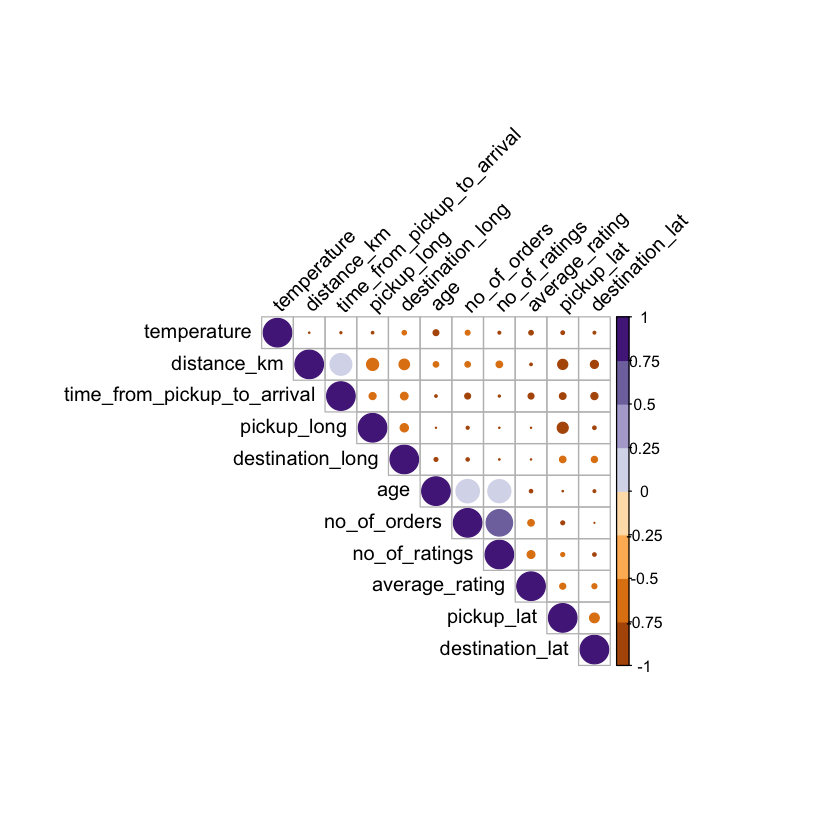

In [24]:
# corrplot(corr_matrix, type="upper", order="hclust", col=c("black","white"), bg="lightblue")
corrplot(corr_matrix, type="upper", order="hclust", col=brewer.pal(n=8, name="PuOr"), tl.col="black", tl.srt=45)

### Combining correlogram with the significance test
#### Computing the p-value of correlations
<p>
To compute the matrix of p-value, a custom R function is used:
</p>

In [25]:
# mat: matrix of data
# ... : further arguments to pass to the native R cor.test function

cor.mtest <- function(mat, ...){
    mat <- as.matrix(mat)
    n <- ncol(mat)
    p.mat <- matrix(NA, n, n)
    diag(p.mat) <- 0
    for (i in 1:(n-1)){
       for (j in (i+1):n){
           tmp <- cor.test(mat[,i], mat[,j], ...)
           p.mat[i,j] <- p.mat[j,i] <- tmp$p.value
       }
    }
    colnames(p.mat) <- rownames(p.mat) <- colnames(mat)
    p.mat
}

# matrix of the p-value of the correlation
data_ <- input_data %>% select_if(is.numeric)
p.mat <- cor.mtest(data_)
head(p.mat)

,platform_type,placement_day_of_month,placement_weekday_mo_1,confirmation_day_of_month,confirmation_weekday_mo_1,arrival_at_pickup_day_of_month,arrival_at_pickup_weekday_mo_1,pickup_day_of_month,pickup_weekday_mo_1,arrival_at_destination_day_of_month,⋯,precipitation_in_millimeters,pickup_lat,pickup_long,destination_lat,destination_long,time_from_pickup_to_arrival,no_of_orders,age,average_rating,no_of_ratings
platform_type,0.000000e+00,0.0631024007,2.735700e-17,0.0629699258,2.852126e-17,0.0629699258,2.852126e-17,0.0629699258,2.852126e-17,0.0629699258,⋯,1.893388e-01,0.6897463,0.001899766,0.3575725,1.571676e-10,0.57736040,0.0004590048,3.706547e-27,0.03274861,3.421740e-06
placement_day_of_month,6.310240e-02,0.0000000000,1.402248e-04,0.0000000000,1.423972e-04,0.0000000000,1.423972e-04,0.0000000000,1.423972e-04,0.0000000000,⋯,1.322001e-06,0.4729493,0.427238524,0.2722205,7.623423e-01,0.03220540,0.2385156890,9.875162e-01,0.06256733,8.035448e-01
placement_weekday_mo_1,2.735700e-17,0.0001402248,0.000000e+00,0.0001415568,0.000000e+00,0.0001415568,0.000000e+00,0.0001415568,0.000000e+00,0.0001415568,⋯,2.353402e-01,0.8936478,0.108974845,0.5313933,8.986467e-01,0.15815978,0.0004191721,2.424708e-02,0.31969745,1.773256e-04
confirmation_day_of_month,6.296993e-02,0.0000000000,1.415568e-04,0.0000000000,1.423099e-04,0.0000000000,1.423099e-04,0.0000000000,1.423099e-04,0.0000000000,⋯,1.322001e-06,0.4735160,0.427652603,0.2716749,7.628316e-01,0.03231173,0.2382916715,9.867196e-01,0.06245219,8.031347e-01
confirmation_weekday_mo_1,2.852126e-17,0.0001423972,0.000000e+00,0.0001423099,0.000000e+00,0.0001423099,0.000000e+00,0.0001423099,0.000000e+00,0.0001423099,⋯,2.353402e-01,0.8977329,0.108077750,0.5359761,8.957868e-01,0.15595935,0.0004239271,2.388995e-02,0.32189756,1.751234e-04
arrival_at_pickup_day_of_month,6.296993e-02,0.0000000000,1.415568e-04,0.0000000000,1.423099e-04,0.0000000000,1.423099e-04,0.0000000000,1.423099e-04,0.0000000000,⋯,1.322001e-06,0.4735160,0.427652603,0.2716749,7.628316e-01,0.03231173,0.2382916715,9.867196e-01,0.06245219,8.031347e-01


### Adding significance level to the correlogram

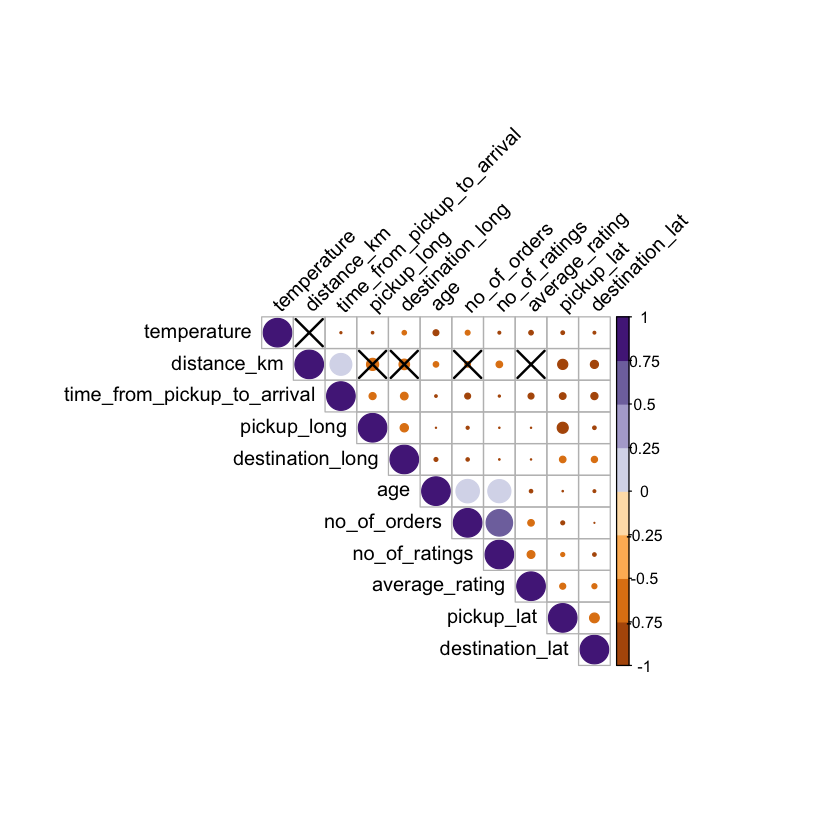

In [26]:
# specialized the insignificant value according to the significant level
corrplot(corr_matrix, type="upper", order="hclust", p.mat = p.mat, sig.level = 0.05, col=brewer.pal(n=8, name="PuOr"), tl.col="black", tl.srt=45)

#### Temperature is not significant as a feature for predicting time_from_pickup_to_arrival
#### distance_km has a strong correlation with time_from_pickup_to_arrival

###  Distribution of the target variable
<p>Convert the time_from_pickup_to_arrival from seconds to minutes</p>
<p>We drop the rows where delivery took less than 3 minutes </p>

In [27]:
cleaned_data.Factor.minute <- cleaned_data.Factor %>% mutate(time_from_pickup_to_arrival_minutes = round(time_from_pickup_to_arrival/60, 2)) %>% filter(time_from_pickup_to_arrival_minutes > 5) %>% glimpse()

Rows: 20,304
Columns: 30
$ platform_type                       <fct> 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1…
$ personal_or_business                <fct> Business, Personal, Business, Busi…
$ placement_day_of_month              <fct> 9, 12, 30, 15, 13, 14, 9, 11, 30, …
$ placement_weekday_mo_1              <fct> 5, 5, 2, 5, 1, 5, 5, 1, 2, 5, 3, 2…
$ placement_time                      <chr> "9:35:46 AM", "11:16:16 AM", "12:3…
$ confirmation_day_of_month           <fct> 9, 12, 30, 15, 13, 14, 9, 11, 30, …
$ confirmation_weekday_mo_1           <fct> 5, 5, 2, 5, 1, 5, 5, 1, 2, 5, 3, 2…
$ confirmation_time                   <chr> "9:40:10 AM", "11:23:21 AM", "12:4…
$ arrival_at_pickup_day_of_month      <fct> 9, 12, 30, 15, 13, 14, 9, 11, 30, …
$ arrival_at_pickup_weekday_mo_1      <fct> 5, 5, 2, 5, 1, 5, 5, 1, 2, 5, 3, 2…
$ arrival_at_pickup_time              <chr> "10:04:47 AM", "11:40:22 AM", "12:…
$ pickup_day_of_month                 <fct> 9, 12, 30, 15, 13, 14, 9, 11, 30, …
$ pickup_weekda

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


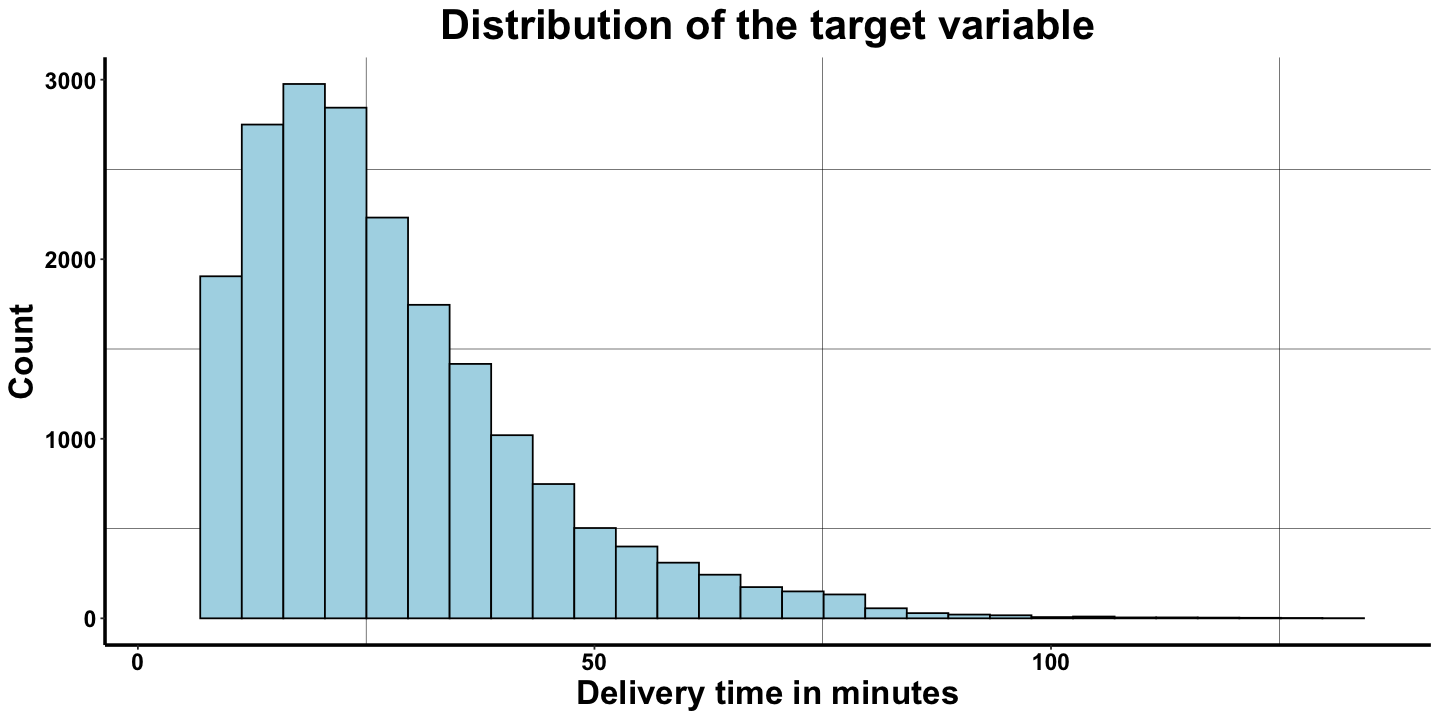

In [28]:
#options(warn=-1, repr.plot.width = 12, repr.plot.height = 6)
options(warn=-1, repr.plot.width = 12, repr.plot.height = 6)
cleaned_data.Factor.minute %>% ggplot() +
  geom_histogram(mapping = aes(x = time_from_pickup_to_arrival_minutes), 
                 fill = "lightblue", col = "black") +
  labs(x = "Delivery time in minutes", y = "Count") + ggtitle('Distribution of the target variable') +
  theme_classic()  + 
  theme(plot.title = element_text(hjust = 0.5, size=25, face='bold'), axis.title = element_text(size=20, face='bold'), axis.text = element_text(size = 14, color = 'black'), axis.line = element_line(size = 1, colour = "black"), panel.grid.minor = element_line(colour="black", size = (0.15)), axis.text.x = element_text(face='bold'), axis.text.y = element_text(face='bold')) + scale_x_continuous(limits = c(3, 135))

In [ ]:
### Comment about the distribution of the target variable and whether it needs to be normalized.

### Machine Learning Models
<p>
    In this project we are trying to predict the estimated delivery time for an order placed via our platform. The estimated time taken to deliver an order is our variable of interest. Thus it is our  <b>label/ target variable.</b>
    A machine learning problem that tries to estimate a target variable is categorized as a <b>supervised machine learning</b> problem.
    The target variable <b>time_from_pickup_to_arrival_minutes</b> is a continous variable. Thus our prediction will involve a <b>regression</b> machine learning model.
</p>

<p>
One of the main features of supervised learning algorithms is that they model dependencies and relationships between the target output and input features to predict the value for new data. Regression algorithms predict the output values based on input features from the data fed in the system. The go-to methodology is the algorithm builds a model on the features of training data and using the model to predict the value for new data.
</p>

#### Linear Regression
Linear Regression establishes a relationship between <b>dependent variable (Y)</b> and one or more <b>independent variables (X)</b> using a best fit straight line (also known as regression line).\

##### Add the linear regression equation here.


<b>How do I test the assumptions underlying linear regression?</b>
<ul>
    <li>Firstly always look at the scatter plot and ask, is it linear?
</li>
    <li> Having obtained the regression equation, calculate the residuals e1 = y_1 - y_1</li>
    <li>A histogram of the residuals will reveal departures from Normality and a plot will reveal whether the residuals increase in size as increases.
</li>
</ul>


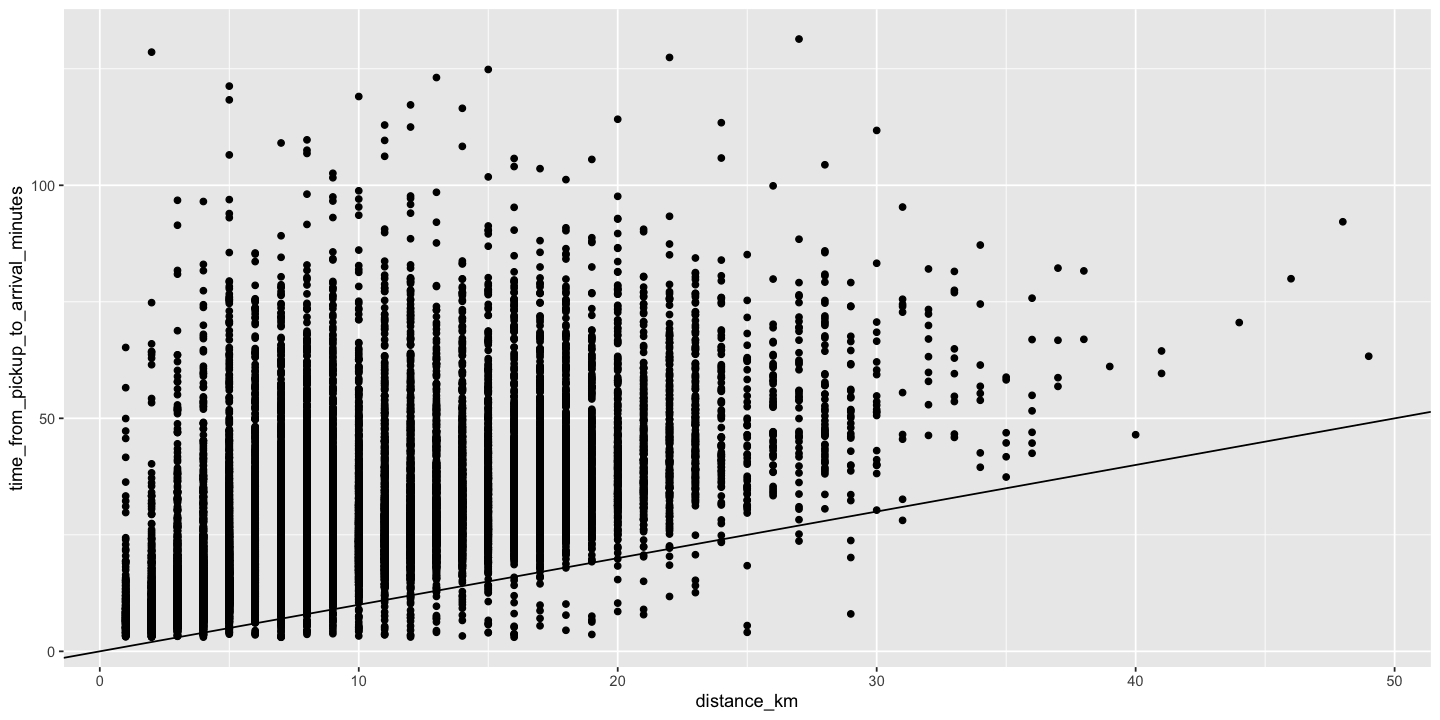

In [61]:
# first construct a scatter diagram.
# scatter plot of time_from_pickup_to_arrival_minutes against distance_km
cleaned_data.Factor.minute %>% ggplot(aes(x=distance_km,y=time_from_pickup_to_arrival_minutes)) + geom_point() + geom_abline()

In [62]:
inTrain <- createDataPartition(y=cleaned_data.Factor.minute$time_from_pickup_to_arrival_minutes, p=0.75, list=FALSE)

train <- cleaned_data.Factor.minute[inTrain,]
test <- cleaned_data.Factor.minute[-inTrain,]
dim(train); dim(test); # look at size of ea

[1] 15229    26

[1] 5075   26

In [65]:
lm.fit <- lm(time_from_pickup_to_arrival_minutes ~ distance_km, data = train)
lm.fit


Call:
lm(formula = time_from_pickup_to_arrival_minutes ~ distance_km, 
    data = train)

Coefficients:
(Intercept)  distance_km  
     11.268        1.641  


In [66]:
summary(lm.fit)


Call:
lm(formula = time_from_pickup_to_arrival_minutes ~ distance_km, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.824  -7.707  -3.363   3.827 114.020 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.26818    0.20760   54.28   <2e-16 ***
distance_km  1.64087    0.01856   88.41   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.98 on 15227 degrees of freedom
Multiple R-squared:  0.3392,	Adjusted R-squared:  0.3391 
F-statistic:  7816 on 1 and 15227 DF,  p-value: < 2.2e-16


R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.


R-squared cannot determine whether the coefficient estimates and predictions are biased, which is why you must assess the residual plots.

R-squared does not indicate whether a regression model is adequate. You can have a low R-squared value for a good model, or a high R-squared value for a model that does not fit the data!

If your R-squared value is low but you have statistically significant predictors, you can still draw important conclusions about how changes in the predictor values are associated with changes in the response value. Regardless of the R-squared, the significant coefficients still represent the mean change in the response for one unit of change in the predictor while holding other predictors in the model constant. Obviously, this type of information can be extremely valuable.

In our analysis, our R-Squared is 33.92% which is considered as low. However, the regression coefficients are significant so we go on to examine our linear model for more insights.

In [112]:
time_predicted=predict(lm.fit,test)
#accuracy(time_predicted, test)

### Diagnosing the accuracy of your linear regression in R

Source: <i>https://www.storybench.org/diagnosing-the-accuracy-of-your-linear-regression-in-r/</i>

Every statistical model is based on a set of assumptions about the world (more importantly, about the measurements and data from that world).
Linear regression is one of many parametric tests that assume the data come from a normal distribution. Parametric models also have assumptions about variation and independence, (covered below), and they rely on the mean and standard deviation.

Checking assumptions is important because if the world we’re assuming the data came from doesn’t track with reality, then the model we’re using to make predictions is worse than useless–it’s misleading. Models have no way of telling us that they’re being used incorrectly.

<b>Normally distributed error terms</b>
<p>
    The assumption of normality in regression refers to the <b>errors (or residuals)</b> in the model, or how well the data fall along the straight line we’re assuming we can draw between the predictor and outcome.
</p>
<p>In linear regression, we want to know if the residuals are normally distributed.
<br>
    So, in a linear regression model, the residuals quantify the distance each point is from the straight line. Normally distributed residuals means that the differences between the predicted data and the observed data are usually 0, and if there are differences larger than 0 it doesn’t happen too often.
</p>

#### The quantile-quantile plot

Quantiles are the proportions of cases that are below a certain value. In a qq-plot, all of the data get sorted and ranked, then each value is given a number that corresponds to the predicted value we could expect if they’re in a normal distribution. The normality of the residuals can now be represented as how closely the data fall along the diagonal line.

First we are going to create a plot with data we know are normal (so we know what the graph should look like), then we will plot the estimated delivery time versus distance in kilometers.

In [74]:
NormalData <- data.frame(
  norm_x = stats::rnorm(n = 1000, mean = 0, sd = 1),
  norm_y = stats::rnorm(n = 1000, mean = 1, sd = 3)
)

In [75]:
linmod_y_x <- lm(norm_y ~ norm_x, data = NormalData)

We can get the fitted (.fitted) and residual (.resid)
values with broom::augment_columns() and store these in a new data
frame, AugNormyNormx. Learn more about the broom package in this
vignette.
All the new variables have a . prefix.

In [76]:
AugNormyNormx <- broom::augment_columns(linmod_y_x, data = NormalData)
AugNormyNormx %>%
  # new added values
  dplyr::select(contains(".")) %>%
  dplyr::glimpse(78)

Rows: 1,000
Columns: 7
$ .fitted    <dbl> 1.0450999, 1.1688974, 1.0068858, 1.1085649, 1.1344110, 1.…
$ .se.fit    <dbl> 0.10702546, 0.12495973, 0.12679279, 0.09967214, 0.1073203…
$ .resid     <dbl> 0.64159789, 7.90842165, -1.99829271, -0.80760592, 3.01381…
$ .hat       <dbl> 0.001195217, 0.001629343, 0.001677496, 0.001036621, 0.001…
$ .sigma     <dbl> 3.097221, 3.087127, 3.096640, 3.097182, 3.095814, 3.09445…
$ .cooksd    <dbl> 2.573082e-05, 5.333975e-03, 3.506553e-04, 3.534778e-05, 5…
$ .std.resid <dbl> 0.207376153, 2.556701981, -0.646040687, -0.261012258, 0.9…


With this new data object, we can build the QQ-plot with help from the <b>qqplotr</b> package.

In [79]:
devtools::install_github("aloy/qqplotr")
#library(qqplotr)

utf8       (1.1.4 -> 1.2.1 ) [CRAN]
pillar     (1.5.0 -> 1.5.1 ) [CRAN]
farver     (2.0.3 -> 2.1.0 ) [CRAN]
DEoptimR   (NA    -> 1.0-8 ) [CRAN]
isoband    (0.2.2 -> 0.2.4 ) [CRAN]
robustbase (NA    -> 0.93-7) [CRAN]
dplyr      (1.0.4 -> 1.0.5 ) [CRAN]
ggplot2    (3.3.2 -> 3.3.3 ) [CRAN]


Installing 8 packages: utf8, pillar, farver, DEoptimR, isoband, robustbase, dplyr, ggplot2
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


✔  checking for file ‘/private/var/folders/vg/6bswdsv92tz16s_1c281j3km0000gn/T/Rtmph8duGN/remotes5ff321613ca/aloy-qqplotr-50af087/DESCRIPTION’ (716ms)
─  preparing ‘qqplotr’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories (576ms)
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘qqplotr_0.0.4.9000.tar.gz’
   


In [80]:
library(qqplotr)


Attaching package: ‘qqplotr’

The following objects are masked from ‘package:ggplot2’:

    StatQqLine, stat_qq_line



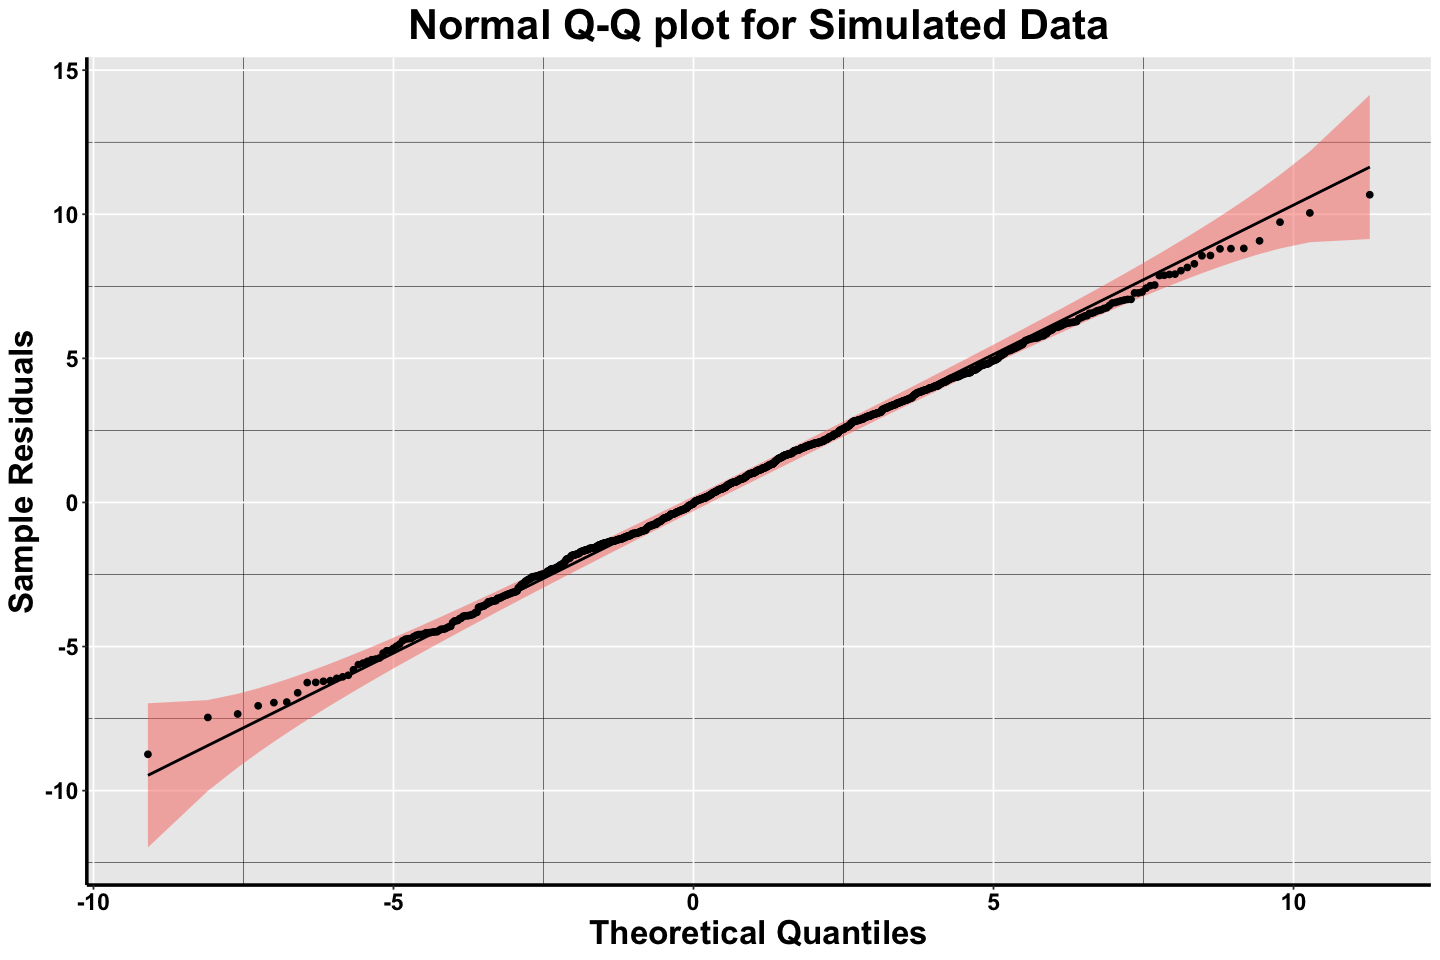

In [83]:
options(warn=-1, repr.plot.width = 12, repr.plot.height = 8)

ggNormQQPlot <- NormalData %>%
  # name the 'sample' the outcome variable (norm_y)
  ggplot(mapping = aes(sample = norm_y)) +
  # add the stat_qq_band
  qqplotr::stat_qq_band(
    bandType = "pointwise",
    mapping = aes(fill = "Normal"), alpha = 0.5,
    show.legend = FALSE
  ) +
  # add the lines
  qqplotr::stat_qq_line() +
  # add the points
  qqplotr::stat_qq_point() +
  # add labs
  ggplot2::labs(
    x = "Theoretical Quantiles",
    y = "Sample Residuals",
    title = "Normal Q-Q plot for Simulated Data"
  ) + theme(plot.title = element_text(hjust = 0.5, size=25, face='bold'), axis.title = element_text(size=20, face='bold'), axis.text = element_text(size = 14, color = 'black'), axis.line = element_line(size = 1, colour = "black"), panel.grid.minor = element_line(colour="black", size = (0.15)), axis.text.x = element_text(face='bold'), axis.text.y = element_text(face='bold'))
ggNormQQPlot

Here we can see that very few points deviate from the diagonal line going through the plot. And that makes sense, because we know these data are normally distributed. Now we have a reference in our mind for how this should look, we can repeat the process with the Sendy logistics data.

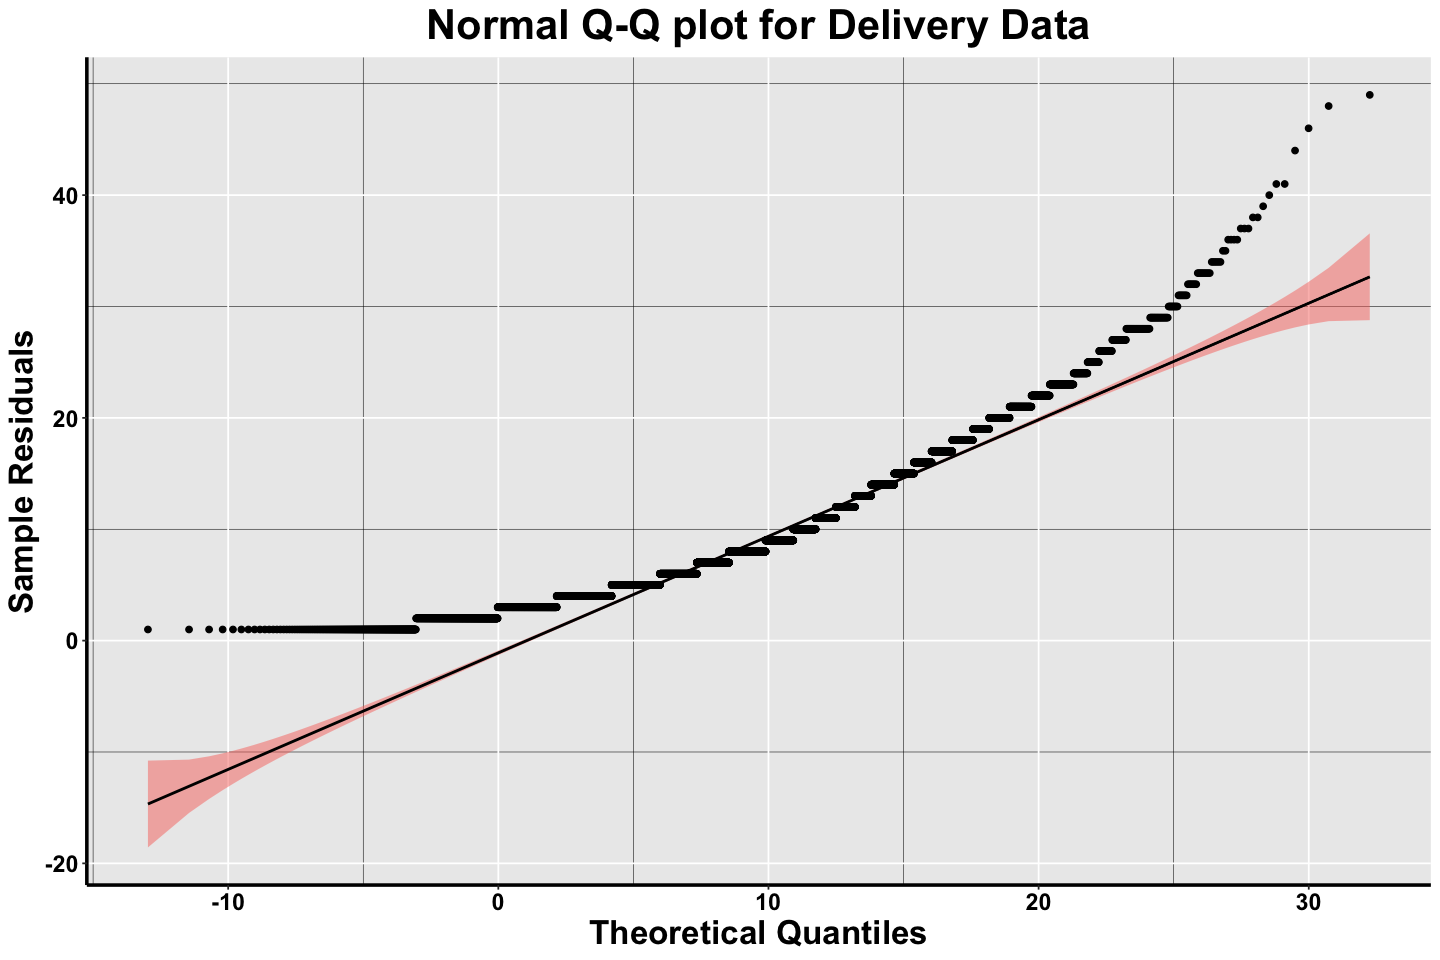

In [88]:
logistics_linear_reg <- broom::augment_columns(lm.fit,
  data = train
)

logistics_linear_reg_QQPlot <- train %>%
  # name the 'sample' the outcome variable (norm_y)
  ggplot(mapping = aes(sample = distance_km)) +
  # add the stat_qq_band
  qqplotr::stat_qq_band(
    bandType = "pointwise",
    mapping = aes(fill = "Normal"), alpha = 0.5,
    show.legend = FALSE
  ) +
  # add the lines
  qqplotr::stat_qq_line() +
  # add the points
  qqplotr::stat_qq_point() +
  # add labs
  ggplot2::labs(
    x = "Theoretical Quantiles",
    y = "Sample Residuals",
    title = "Normal Q-Q plot for Delivery Data"
  ) + theme(plot.title = element_text(hjust = 0.5, size=25, face='bold'), axis.title = element_text(size=20, face='bold'), axis.text = element_text(size = 14, color = 'black'), axis.line = element_line(size = 1, colour = "black"), panel.grid.minor = element_line(colour="black", size = (0.15)), axis.text.x = element_text(face='bold'), axis.text.y = element_text(face='bold'))
logistics_linear_reg_QQPlot

The graph above deviates from the diagonal towards the upper end of theSample Residuals and Theoretical Quantiles. This tells us the data that are deviating from the straight line aren’t normal. We can verify this by dropping the <b>dnorm</b> function over a histogram, too.



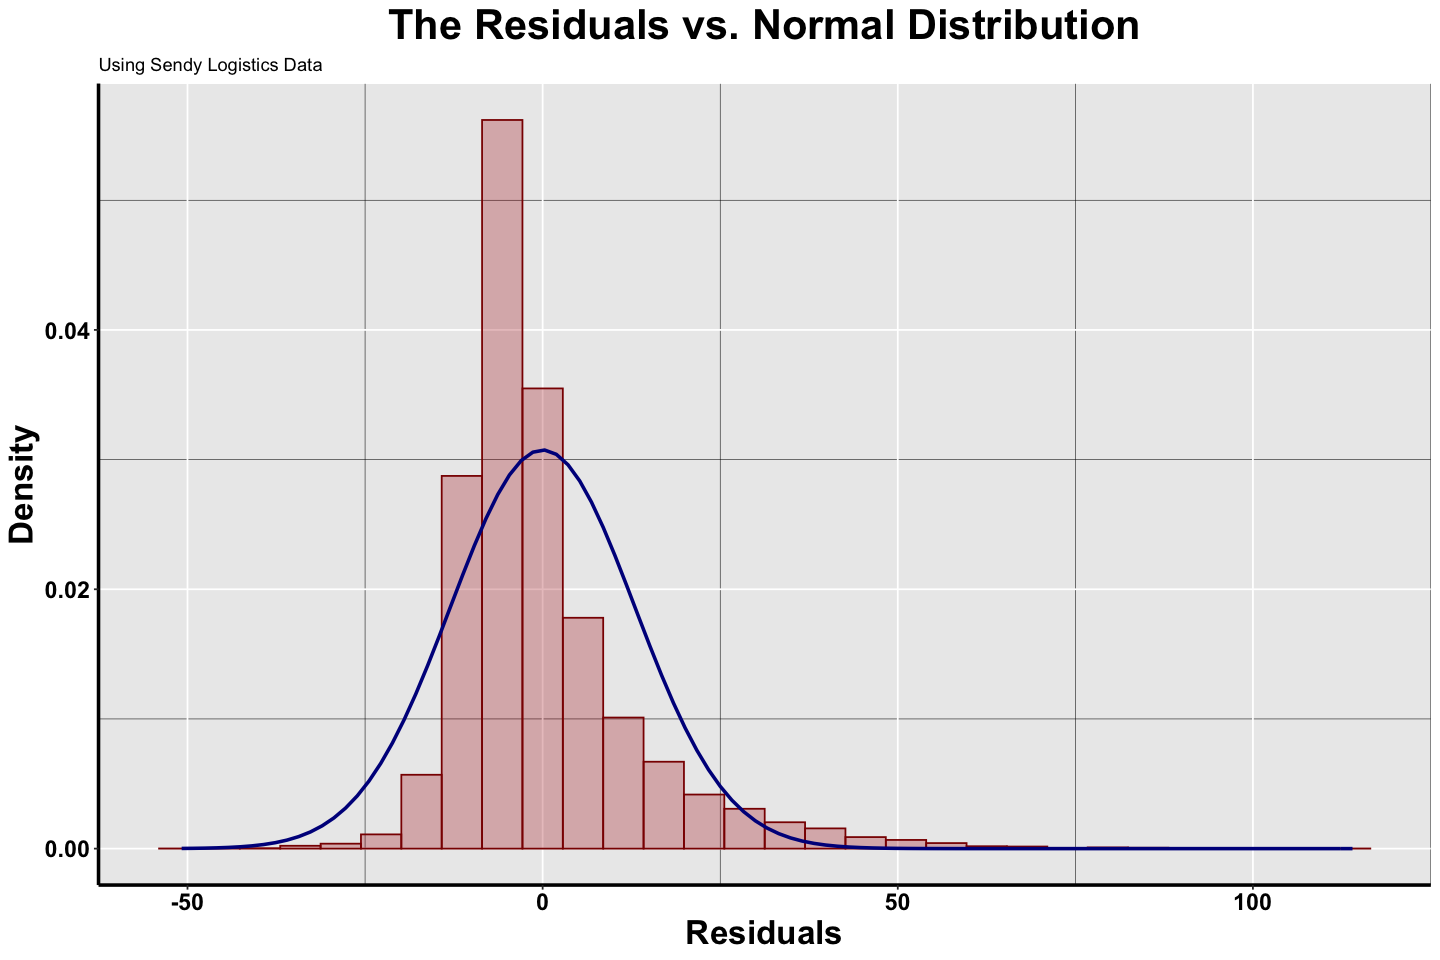

In [91]:
ggHistNormResid <- logistics_linear_reg %>%
  ggplot2::ggplot(aes(x = .resid)) +
  ggplot2::geom_histogram(aes(y = ..density..),
    colour = "darkred",
    fill = "firebrick",
    alpha = 0.3,
    bins = 30
  ) +
  ggplot2::stat_function(
    fun = dnorm,
    args = list(
      mean = mean(logistics_linear_reg$.resid, na.rm = TRUE),
      sd = sd(logistics_linear_reg$.resid, na.rm = TRUE)
    ),
    color = "darkblue",
    size = 1
  ) +
  ggplot2::labs(
    x = "Residuals",
    y = "Density",
    title = "The Residuals vs. Normal Distribution",
    subtitle = "Using Sendy Logistics Data"
  ) + theme(plot.title = element_text(hjust = 0.5, size=25, face='bold'), axis.title = element_text(size=20, face='bold'), axis.text = element_text(size = 14, color = 'black'), axis.line = element_line(size = 1, colour = "black"), panel.grid.minor = element_line(colour="black", size = (0.15)), axis.text.x = element_text(face='bold'), axis.text.y = element_text(face='bold'))
ggHistNormResid

Again, we see that when we lay the normal distribution over the histogram of the residuals, there are humps poking out above the blue normal distribution (i.e. the residuals have heavier tails). We will continue to see if these data meet the assumptions.

#### Linearity
<p>
    The next question we will ask ourselves is, <i>“does a linear relationship make sense?”</i> We can confirm linearity with a scatterplot of the <b><i>.resid</i></b> and <b><i>.fitted</i></b> values. If data are normally distributed, there will be more points above and below the 0 line (which runs through the center of the plot).
</p>

#### Residuals vs. fitted values

The graph below is called the <b>Residual vs. Fitted Plot</b> and it puts the <b><i>.fitted</i></b> on the x axis, and <b><i>.resid</i></b> on the y axis.

In [94]:
devtools::install_github("slowkow/ggrepel")




✔  checking for file ‘/private/var/folders/vg/6bswdsv92tz16s_1c281j3km0000gn/T/Rtmph8duGN/remotes5ff931dd9a/slowkow-ggrepel-f5513ae/DESCRIPTION’ (574ms)
─  preparing ‘ggrepel’: (451ms)
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘ggrepel_0.9.1.9999.tar.gz’
   


In [95]:
library(ggrepel)

`geom_smooth()` using formula 'y ~ x'


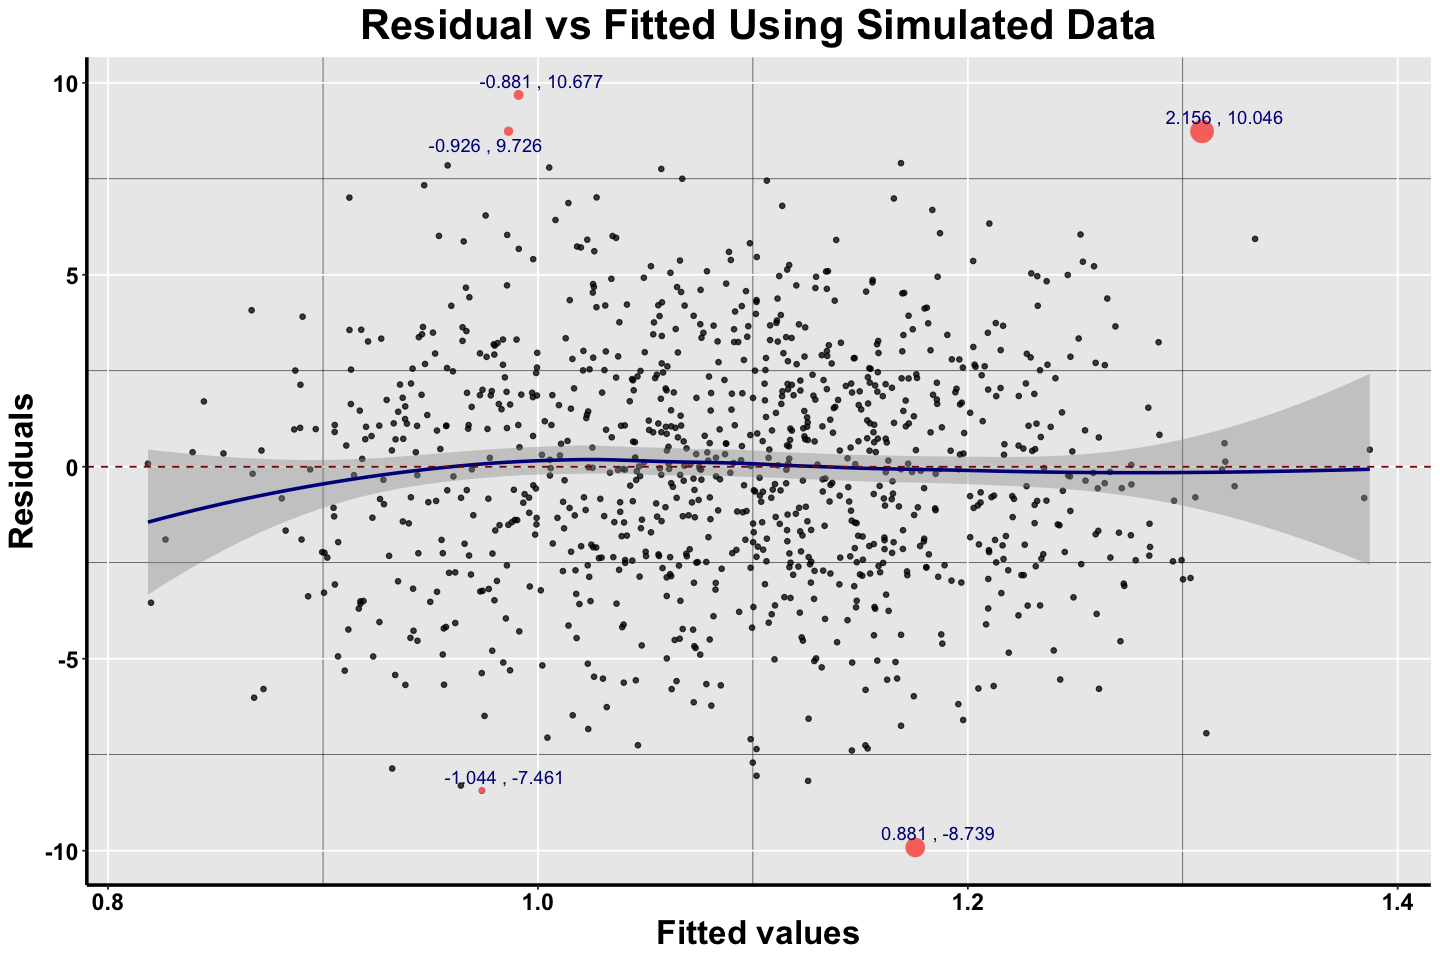

In [97]:
# get outliers for the data
NonNormalResid <- AugNormyNormx %>%
  dplyr::arrange(dplyr::desc(abs(.resid))) %>%
  dplyr::mutate(
    norm_x = base::round(norm_x, digits = 3),
    norm_y = base::round(norm_y, digits = 3)
  ) %>%
  utils::head(5)

ggResidVsFit <- AugNormyNormx %>%
  # fited on the x, residuals on the y
  ggplot2::ggplot(aes(
    x = .fitted,
    y = .resid
  )) +
  # add the points
  ggplot2::geom_point(
    size = 1.2,
    alpha = 3 / 4
  ) +
  # add the line for the points
  ggplot2::stat_smooth(
    method = "loess",
    color = "darkblue",
    show.legend = FALSE
  ) +
  # add the line for the zero intercept
  ggplot2::geom_hline(
    # add y intercept
    yintercept = 0,
    # add color
    color = "darkred",
    # add line type
    linetype = "dashed"
  ) +
  # add points for the outliers
  ggplot2::geom_point(
    data = NonNormalResid,
    aes(
      color = "darkred",
      size = .fitted
    ),
    show.legend = FALSE
  ) +
  # add text labels for outliers
  ggrepel::geom_text_repel(
    data = NonNormalResid,
    color = "darkblue",
    aes(label = base::paste(
      NonNormalResid$norm_x, ",",
      NonNormalResid$norm_y
    )),
    show.legend = FALSE
  ) +
  ggplot2::labs(
    x = "Fitted values",
    y = "Residuals",
    title = "Residual vs Fitted Using Simulated Data"
  ) + theme(plot.title = element_text(hjust = 0.5, size=25, face='bold'), axis.title = element_text(size=20, face='bold'), axis.text = element_text(size = 14, color = 'black'), axis.line = element_line(size = 1, colour = "black"), panel.grid.minor = element_line(colour="black", size = (0.15)), axis.text.x = element_text(face='bold'), axis.text.y = element_text(face='bold'))
ggResidVsFit

<p>We’ve plotted five points with the highest <b>.resids</b>, and we can see they’re also the furthest from the center line. The blue <b>loess</b> line curves above and below the zero line at the edges of the data, and the <b>standard error bands</b> (the gray areas) get larger. This would be concerning, but there are about just the same number of points above as below the red zero line.

We’ll repeat this process for the Sendy dataset in logistics_linear_reg (after creating the non_norm_resid_reg data frame).</p>

In [101]:
# get outliers for the data in NonNormResidRunsWins
non_norm_resid_reg <- logistics_linear_reg %>%
  dplyr::arrange(dplyr::desc(abs(.resid))) %>%
  head(5)

head(non_norm_resid_reg,5)

.rownames,platform_type,personal_or_business,placement_day_of_month,placement_weekday_mo_1,placement_time,confirmation_day_of_month,confirmation_weekday_mo_1,confirmation_time,arrival_at_pickup_day_of_month,⋯,rider_id,time_from_pickup_to_arrival,time_from_pickup_to_arrival_minutes,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
<chr>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<chr>,<fct>,⋯,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15682,3,Business,5,2,11:10:23 AM,5,2,11:10:58 AM,5,⋯,Rider_Id_365,7714,128.57,14.54993,0.1765976,114.02007,0.0001851955,12.94434,0.007151293,8.787228
3161,1,Personal,1,1,3:21:52 PM,1,1,3:26:18 PM,1,⋯,Rider_Id_612,7277,121.28,19.47255,0.1359687,101.80745,0.0001097838,12.95103,0.003379275,7.845737
3604,3,Business,21,5,12:57:45 PM,21,5,1:01:39 PM,21,⋯,Rider_Id_554,7100,118.33,19.47255,0.1359687,98.85745,0.0001097838,12.95253,0.003186275,7.618397
2189,3,Business,8,2,10:53:57 AM,8,2,10:54:31 AM,8,⋯,Rider_Id_268,7143,119.05,27.67692,0.1053632,91.37308,0.0000659233,12.95614,0.001634419,7.041463
18321,3,Business,2,5,4:51:45 PM,2,5,5:09:41 PM,2,⋯,Rider_Id_287,6391,106.52,19.47255,0.1359687,87.04745,0.0001097838,12.95810,0.002470453,6.708266


`geom_smooth()` using formula 'y ~ x'


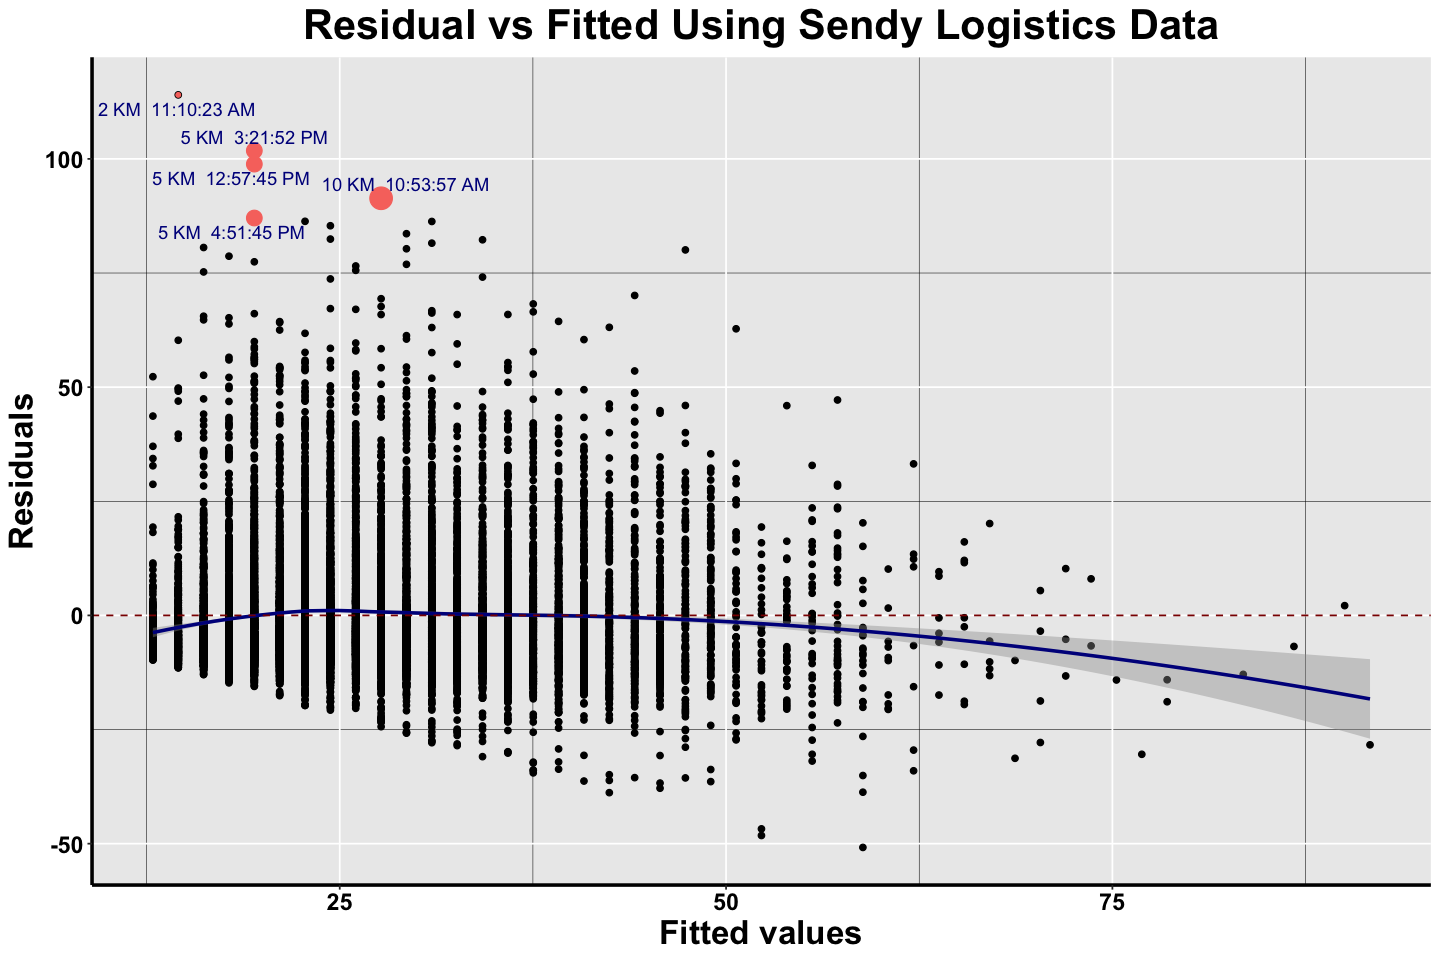

In [106]:
# plot ggResidVsFitRunsWins
ggResidVsFitRunsWins <- logistics_linear_reg %>%
  ggplot2::ggplot(aes(
    x = .fitted,
    y = .resid
  )) +
  # add the points
  ggplot2::geom_point(show.legend = FALSE) +
  # add the line for the points
  ggplot2::stat_smooth(
    method = "loess",
    color = "darkblue",
    show.legend = FALSE
  ) +
  # add the line for the zero intercept
  ggplot2::geom_hline(
    # add y intercept
    yintercept = 0,
    # add color
    color = "darkred",
    # add line type
    linetype = "dashed"
  ) +
  # add points for the outliers
  ggplot2::geom_point(
    data = non_norm_resid_reg,
    aes(
      color = "darkred",
      size = .fitted
    ),
    show.legend = FALSE
  ) +
  # add text labels
  ggrepel::geom_text_repel(
    data = non_norm_resid_reg,
    color = "darkblue",
    aes(label = base::paste(
      non_norm_resid_reg$distance_km, "KM ",
      non_norm_resid_reg$placement_time
    )),
    show.legend = FALSE
  ) +
  ggplot2::labs(
    x = "Fitted values",
    y = "Residuals",
    title = "Residual vs Fitted Using Sendy Logistics Data"
  )  + theme(plot.title = element_text(hjust = 0.5, size=25, face='bold'), axis.title = element_text(size=20, face='bold'), axis.text = element_text(size = 14, color = 'black'), axis.line = element_line(size = 1, colour = "black"), panel.grid.minor = element_line(colour="black", size = (0.15)), axis.text.x = element_text(face='bold'), axis.text.y = element_text(face='bold'))
ggResidVsFitRunsWins

The plotted points are telling us where the linear model does worst in predicting delivery times <b>(time_from_pickup_to_arrival_minutes)</b> from the distance <b>(distance_km)</b>.
The majority of the outliers are from orders to be delivered 5 KM , and only 1 is 2 KM.

### Homogeneity of variance

<a href="https://en.wikipedia.org/wiki/Homogeneity_(statistics)">Wikipedia</a> does a great job describing homogeneity (and it’s opposite, heterogeneity),“they relate to the validity of the often convenient assumption that the statistical properties of any one part of an overall dataset are the same as any other part”

<b><i>Convenient</i></b> is aptly used here, because it’s inconvenient when that statement is not true. If the variance is homogeneious, this means any variation in the outcome variable (<b>time_from_pickup_to_arrival_minutes</b>) should be stable at all levels of the other variable (<b>distance_km</b>).

<br>
<legend>heteroscedasticity</legend>
Data are considered <b>heteroscedastic</b> if the variance of their residuals change as a function of the outcome value. Conversely, data are homoscedastic if the variance is the same across all values of predictor variables. The graph we use to assess these two measures is called the <b>Scale-Location plot (or Spread-Location plot)</b>.

We’ll build a Scale-Location graph below using the AugNormyNormx data (Normally Distributed Data). 
Recall this model used norm_x as the predictor and norm_y as the outcome.

`geom_smooth()` using formula 'y ~ x'


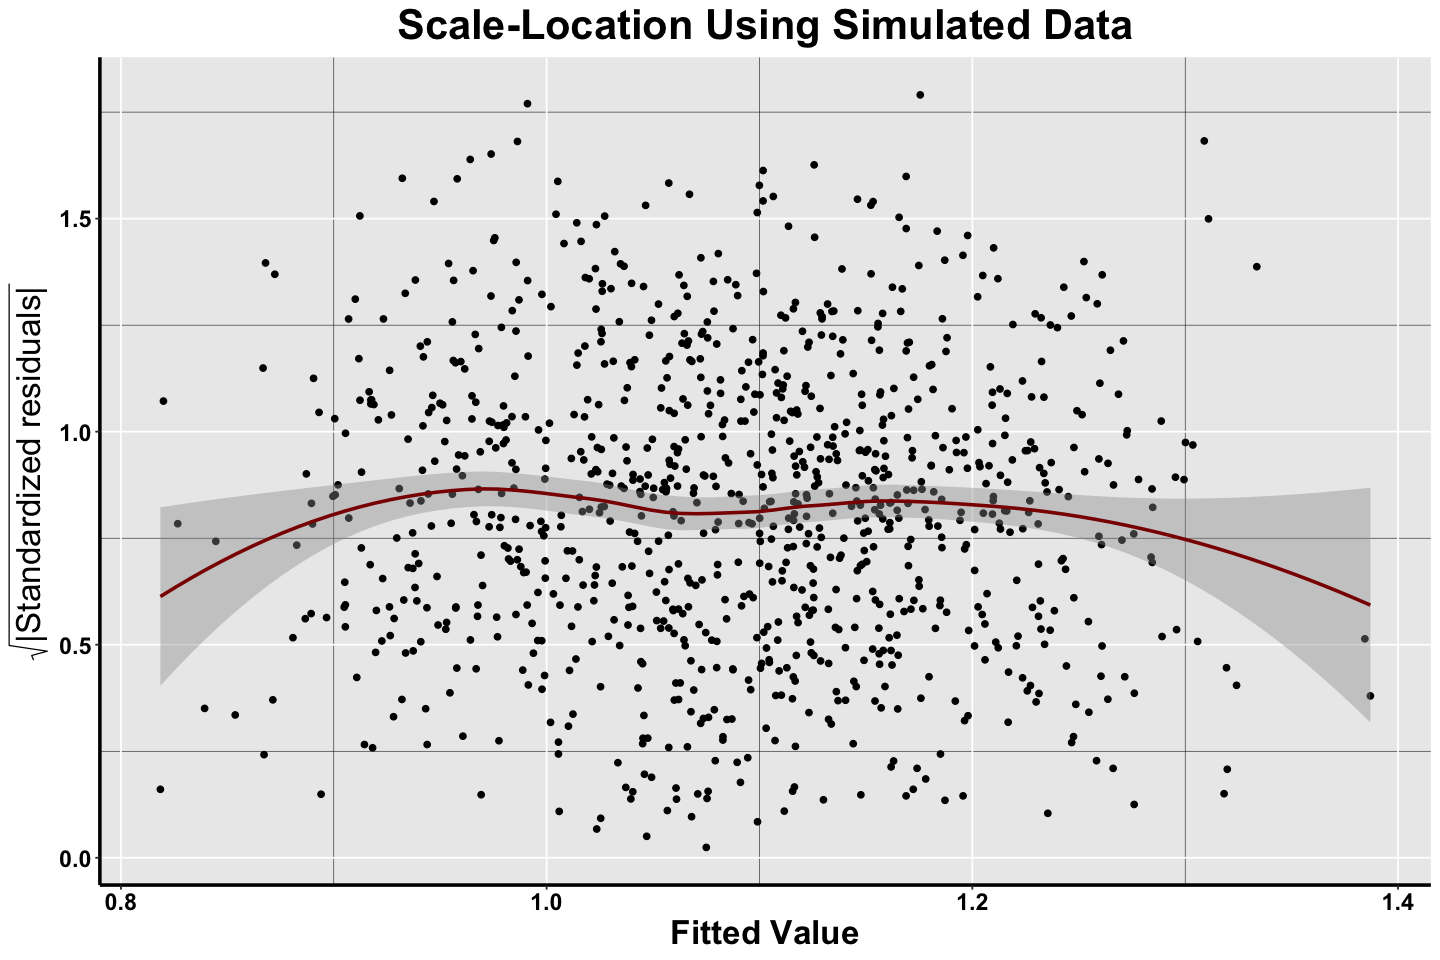

In [108]:
ggScaleVSLocation <- AugNormyNormx %>%
  # here we plot the fitted and we get the squared root of the absolute value
  # of the std.resic
  ggplot2::ggplot(aes(
    x = .fitted,
    y = sqrt(abs(.std.resid))
  )) +
  # add the points
  ggplot2::geom_point(na.rm = TRUE) +
  # add stat smooth
  stat_smooth(
    method = "loess",
    color = "darkred",
    na.rm = TRUE
  ) +
  # add the labs
  ggplot2::labs(
    x = "Fitted Value",
    y = expression(sqrt("|Standardized residuals|")),
    title = "Scale-Location Using Simulated Data"
  )  + theme(plot.title = element_text(hjust = 0.5, size=25, face='bold'), axis.title = element_text(size=20, face='bold'), axis.text = element_text(size = 14, color = 'black'), axis.line = element_line(size = 1, colour = "black"), panel.grid.minor = element_line(colour="black", size = (0.15)), axis.text.x = element_text(face='bold'), axis.text.y = element_text(face='bold'))
ggScaleVSLocation

The <b>Scale-Location (or Spread-Location) plot</b> puts the <b>square root <i>(sqrt())</i></b> of the absolute value <b><i>(abs())</i></b> of the standardized residuals <b><i>(.std.resid)</i></b> on the y.
The <b><i>.fitted</i></b> values go on the x.
If the data are homoscedastic, we should see a <b>relatively straight line through the center of the plot</b>, and an equal number of points above and below the line.

We’ll rebuild the Scale-Location plot, but this time use the <b>logistics_linear_reg</b> data frame.


`geom_smooth()` using formula 'y ~ x'


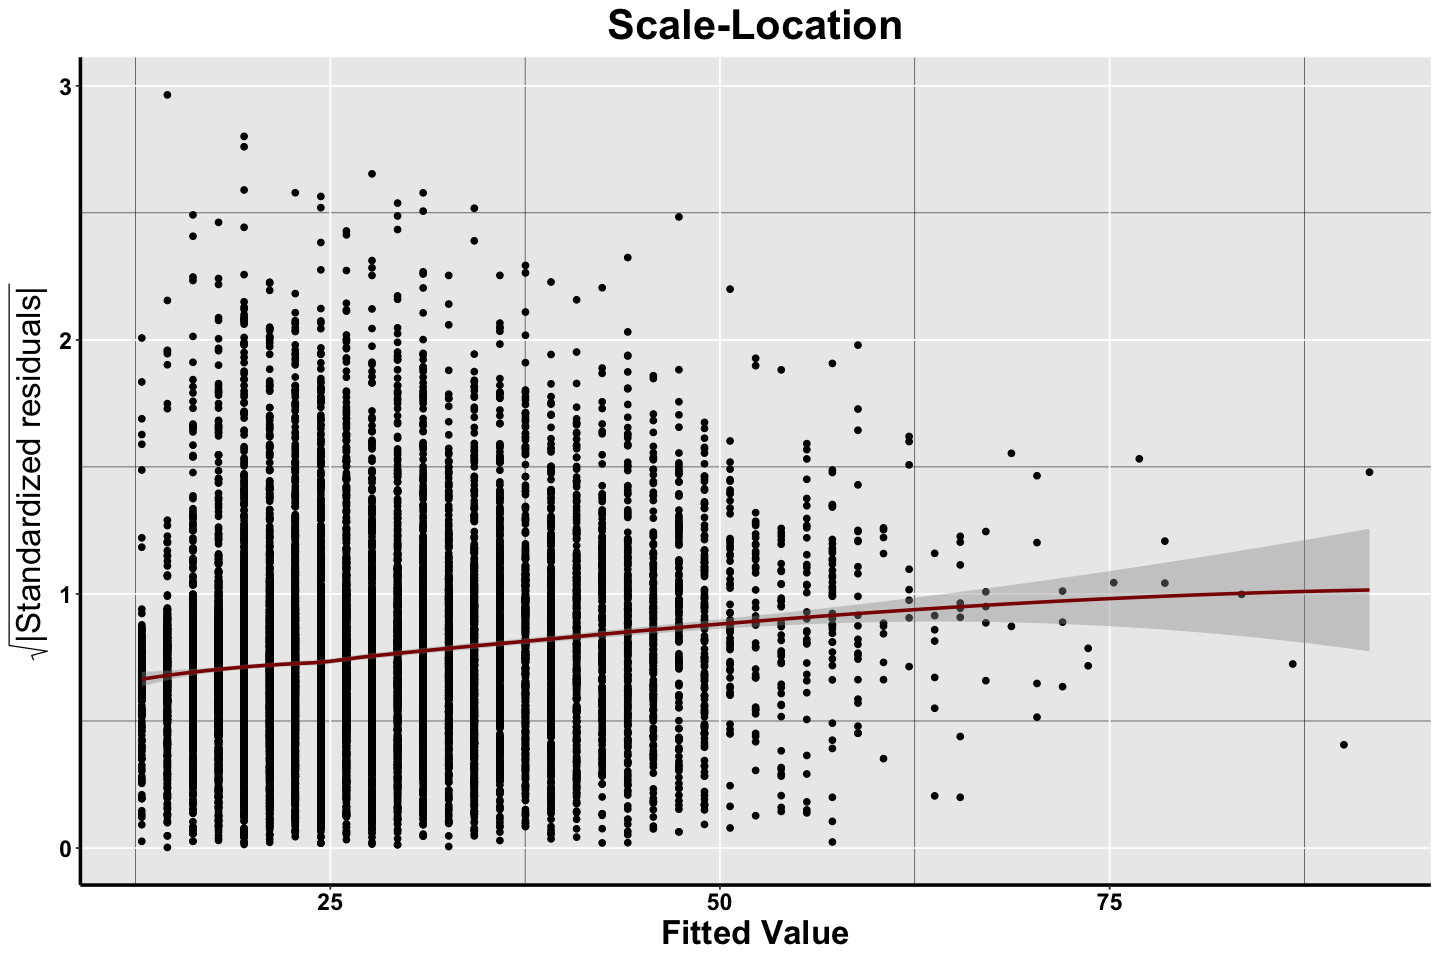

In [110]:
ggScaleVSLocRundiffWins <- logistics_linear_reg %>%
  # here we plot the fitted and we get the squared root of the absolute value
  # of the std.resic
  ggplot2::ggplot(aes(
    x = .fitted,
    y = sqrt(abs(.std.resid))
  )) +
  # add the points
  ggplot2::geom_point(na.rm = TRUE) +
  # add stat smooth
  stat_smooth(
    method = "loess",
    color = "darkred",
    na.rm = TRUE
  ) +
  # add the labs
  ggplot2::labs(
    x = "Fitted Value",
    y = expression(sqrt("|Standardized residuals|")),
    title = "Scale-Location"
  ) + theme(plot.title = element_text(hjust = 0.5, size=25, face='bold'), axis.title = element_text(size=20, face='bold'), axis.text = element_text(size = 14, color = 'black'), axis.line = element_line(size = 1, colour = "black"), panel.grid.minor = element_line(colour="black", size = (0.15)), axis.text.x = element_text(face='bold'), axis.text.y = element_text(face='bold'))
ggScaleVSLocRundiffWins

This doesn’t look much like the nice normally distributed data above. First off, the gray area around the red line indicates a large standard error that increases with increase in distance fitted. 
<br>
Second, the red line isn’t very straight across the horizontal axis. But these together, and it’s not looking like these data are very <b>homoscedastic</b>, which makes them <b>heteroscedastic</b> (which is, indeed, inconvenient).

### Random Forest Regression Models


In [16]:
########## Sample only a few observations of the dataset for easier computing time
set.seed(20) # for reproducibility

shuffled_df <- imputed_data[sample(100),] # shuffle rowwise
head(shuffled_df)
dim(shuffled_df)

,platform_type,personal_or_business,placement_day_of_month,placement_weekday_mo_1,placement_time,confirmation_day_of_month,confirmation_weekday_mo_1,confirmation_time,arrival_at_pickup_day_of_month,arrival_at_pickup_weekday_mo_1,⋯,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,time_from_pickup_to_arrival,no_of_orders,age,average_rating,no_of_ratings
,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<int>
38,3,Business,30,3,1:17:29 PM,30,3,1:18:11 PM,30,3,⋯,-1.257033,36.78697,-1.296310,36.76882,Rider_Id_328,1382,635,674,12.0,35
63,3,Business,27,3,11:06:06 AM,27,3,11:07:19 AM,27,3,⋯,-1.265715,36.82382,-1.228911,36.88188,Rider_Id_269,1019,721,409,13.8,60
2,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,⋯,-1.351453,36.89932,-1.295004,36.81436,Rider_Id_856,1993,396,339,13.6,69
29,3,Business,14,3,1:53:26 PM,14,3,2:16:41 PM,14,3,⋯,-1.279395,36.82536,-1.324235,36.82025,Rider_Id_237,3241,788,572,14.2,72
94,3,Business,3,3,1:54:12 PM,3,3,1:56:02 PM,3,3,⋯,-1.288692,36.82415,-1.257147,36.79506,Rider_Id_6,824,2959,1156,14.1,655
62,3,Business,1,3,10:58:13 AM,1,3,10:59:23 AM,1,3,⋯,-1.262864,36.80704,-1.263419,36.80603,Rider_Id_208,838,779,873,14.2,89


[1] 100  29

In [17]:
factor_cols <- shuffled_df %>% select_if(is.factor)
factor_inputs <- shuffled_df %>% select(time_from_pickup_to_arrival) %>% cbind(factor_cols)
dummies_model <- dummyVars(time_from_pickup_to_arrival ~ ., data=factor_inputs)
# Create the dummy variables using predict. The Y variable (Time_from_pickup_to_arrival) will not be present in trainData_mat.
dummy_vars_matrix <- predict(dummies_model, newdata = factor_inputs)
# Convert to dataframe
dummy_vars.df <- data.frame(dummy_vars_matrix)
head(dummy_vars.df)

,platform_type.1,platform_type.2,platform_type.3,platform_type.4,personal_or_business.Business,personal_or_business.Personal,placement_day_of_month.1,placement_day_of_month.2,placement_day_of_month.3,placement_day_of_month.4,⋯,arrival_at_destination_day_of_month.29,arrival_at_destination_day_of_month.30,arrival_at_destination_day_of_month.31,arrival_at_destination_weekday_mo_1.1,arrival_at_destination_weekday_mo_1.2,arrival_at_destination_weekday_mo_1.3,arrival_at_destination_weekday_mo_1.4,arrival_at_destination_weekday_mo_1.5,arrival_at_destination_weekday_mo_1.6,arrival_at_destination_weekday_mo_1.7
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
38,0,0,1,0,1,0,0,0,0,0,⋯,0,1,0,0,0,1,0,0,0,0
63,0,0,1,0,1,0,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
29,0,0,1,0,1,0,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0
94,0,0,1,0,1,0,0,0,1,0,⋯,0,0,0,0,0,1,0,0,0,0
62,0,0,1,0,1,0,1,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0


In [20]:
# replace all the factor columns in the training dataset with the new one hot encoded columns
factor_colnames <- names(factor_cols)
training_df <- shuffled_df %>% select(-c(factor_colnames)) %>% cbind(dummy_vars.df)
head(training_df)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(factor_colnames)` instead of `factor_colnames` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


,placement_time,confirmation_time,arrival_at_pickup_time,pickup_time,arrival_at_destination_time,distance_km,temperature,pickup_lat,pickup_long,destination_lat,⋯,arrival_at_destination_day_of_month.29,arrival_at_destination_day_of_month.30,arrival_at_destination_day_of_month.31,arrival_at_destination_weekday_mo_1.1,arrival_at_destination_weekday_mo_1.2,arrival_at_destination_weekday_mo_1.3,arrival_at_destination_weekday_mo_1.4,arrival_at_destination_weekday_mo_1.5,arrival_at_destination_weekday_mo_1.6,arrival_at_destination_weekday_mo_1.7
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
38,1:17:29 PM,1:18:11 PM,1:28:47 PM,1:34:12 PM,1:57:14 PM,8,29.2,-1.257033,36.78697,-1.296310,⋯,0,1,0,0,0,1,0,0,0,0
63,11:06:06 AM,11:07:19 AM,11:26:44 AM,11:31:44 AM,11:48:43 AM,9,26.3,-1.265715,36.82382,-1.228911,⋯,0,0,0,0,0,1,0,0,0,0
2,11:16:16 AM,11:23:21 AM,11:40:22 AM,11:44:09 AM,12:17:22 PM,16,26.4,-1.351453,36.89932,-1.295004,⋯,0,0,0,0,0,0,0,1,0,0
29,1:53:26 PM,2:16:41 PM,2:25:54 PM,2:28:10 PM,3:22:11 PM,9,25.6,-1.279395,36.82536,-1.324235,⋯,0,0,0,0,0,1,0,0,0,0
94,1:54:12 PM,1:56:02 PM,1:56:25 PM,2:31:08 PM,2:44:52 PM,7,26.7,-1.288692,36.82415,-1.257147,⋯,0,0,0,0,0,1,0,0,0,0
62,10:58:13 AM,10:59:23 AM,11:05:37 AM,11:14:16 AM,11:28:14 AM,2,20.1,-1.262864,36.80704,-1.263419,⋯,0,0,0,0,0,1,0,0,0,0


In [18]:
head(shuffled_df)

,platform_type,personal_or_business,placement_day_of_month,placement_weekday_mo_1,placement_time,confirmation_day_of_month,confirmation_weekday_mo_1,confirmation_time,arrival_at_pickup_day_of_month,arrival_at_pickup_weekday_mo_1,⋯,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,time_from_pickup_to_arrival,no_of_orders,age,average_rating,no_of_ratings
,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<int>
38,3,Business,30,3,1:17:29 PM,30,3,1:18:11 PM,30,3,⋯,-1.257033,36.78697,-1.296310,36.76882,Rider_Id_328,1382,635,674,12.0,35
63,3,Business,27,3,11:06:06 AM,27,3,11:07:19 AM,27,3,⋯,-1.265715,36.82382,-1.228911,36.88188,Rider_Id_269,1019,721,409,13.8,60
2,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,⋯,-1.351453,36.89932,-1.295004,36.81436,Rider_Id_856,1993,396,339,13.6,69
29,3,Business,14,3,1:53:26 PM,14,3,2:16:41 PM,14,3,⋯,-1.279395,36.82536,-1.324235,36.82025,Rider_Id_237,3241,788,572,14.2,72
94,3,Business,3,3,1:54:12 PM,3,3,1:56:02 PM,3,3,⋯,-1.288692,36.82415,-1.257147,36.79506,Rider_Id_6,824,2959,1156,14.1,655
62,3,Business,1,3,10:58:13 AM,1,3,10:59:23 AM,1,3,⋯,-1.262864,36.80704,-1.263419,36.80603,Rider_Id_208,838,779,873,14.2,89


In [25]:
# Define the control
trControl <- trainControl(method = "cv",
    number = 5,
    search = "grid")

In [28]:
# try the random forest model with default values
#run the model
rf_default <- train(time_from_pickup_to_arrival ~ ., data = shuffled_df, 
                    method="rf", metric="RMSE", importance=T,
                    trControl = trControl)
# print the results
print(rf_default)

Random Forest 

100 samples
 28 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 80, 80, 80, 80, 80 
Resampling results across tuning parameters:

  mtry  RMSE       Rsquared    MAE     
    2   1020.2078  0.06675324  826.1946
   39    952.5459  0.20167892  728.9475
  770    945.1985  0.23164130  695.5274

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 770.


In [29]:
importance <- varImp(rf_default)
print(importance)

rf variable importance

  only 20 most important variables shown (out of 770)

                                     Overall
distance_km                           100.00
placement_day_of_month8                22.00
confirmation_day_of_month8             21.70
platform_type3                         21.69
pickup_day_of_month8                   21.16
temperature                            19.34
pickup_day_of_month27                  19.31
arrival_at_destination_day_of_month8   19.15
arrival_at_pickup_day_of_month8        18.56
pickup_day_of_month25                  18.52
destination_lat                        18.07
pickup_day_of_month23                  18.05
arrival_at_pickup_day_of_month23       17.91
confirmation_day_of_month21            17.79
placement_day_of_month27               17.50
pickup_day_of_month19                  17.48
personal_or_businessPersonal           17.32
arrival_at_pickup_weekday_mo_14        17.28
placement_day_of_month3                16.98
pickup_day_of_month3 

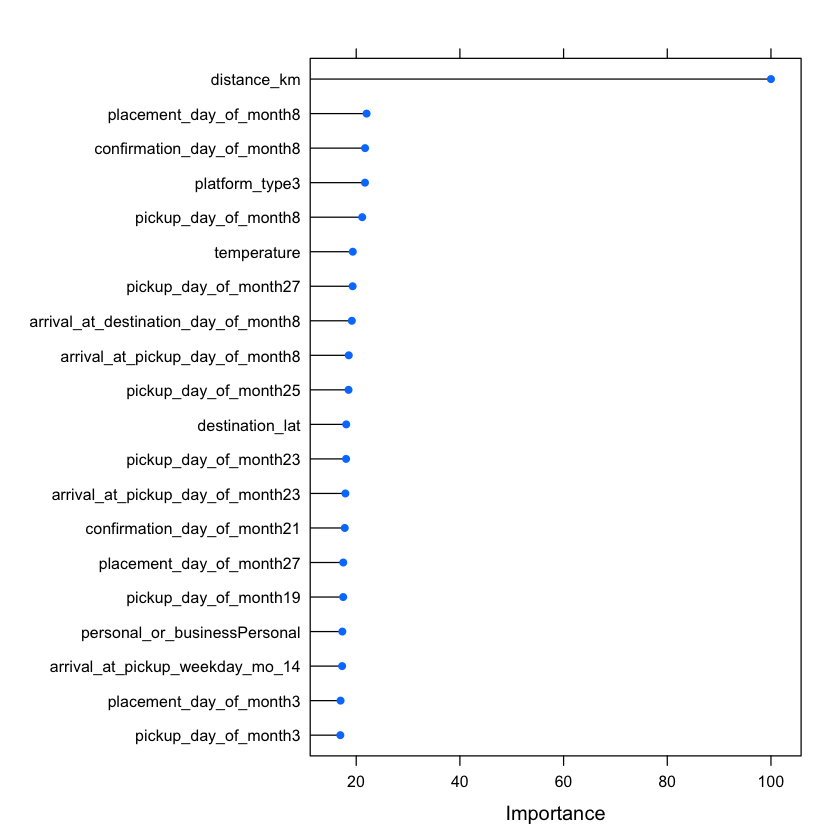

In [31]:
plot(importance, 20)